In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

from keras.models import Sequential
from keras.layers import Dense

In [71]:
data = pd.read_csv('data_evaluacion_decoded.csv')

In [72]:
data.head()

,Unnamed: 0,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [73]:
data = data.drop(columns=['Unnamed: 0'])
data.head()

,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   edad              48842 non-null  int64
 1   fnlwgt            48842 non-null  int64
 2   educacion         48842 non-null  int64
 3   educacion_num     48842 non-null  int64
 4   estado_civil      48842 non-null  int64
 5   relacion          48842 non-null  int64
 6   ocupacion         48842 non-null  int64
 7   raza              48842 non-null  int64
 8   genero            48842 non-null  int64
 9   ganancia-capital  48842 non-null  int64
 10  perdida-capital   48842 non-null  int64
 11  horas_semana      48842 non-null  int64
 12  pais              48842 non-null  int64
 13  tipo_empleo       48842 non-null  int64
 14  salario           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [75]:
x=data.iloc[:,0:13].values 
y=data.iloc[:,14].values 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [76]:
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
modelo = Sequential()
modelo.add(Dense(12,activation='relu',input_shape = (13,)))
modelo.add(Dense(8,activation='relu'))
#Salida
modelo.add(Dense(1,activation='sigmoid'))

# Configuración del modelo

modelo.compile(
    loss="binary_crossentropy",  #Para percepton simple 
    optimizer = "adam",
    metrics = ["accuracy"]
)

d:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
historial = modelo.fit(x_train,y_train, epochs = 100,batch_size=10) #batch registro para ver aprendizaje verbose

Epoch 1/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.7817 - loss: 0.4515
Epoch 2/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8345 - loss: 0.3578
Epoch 3/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8358 - loss: 0.3499
Epoch 4/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8331 - loss: 0.3526
Epoch 5/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8331 - loss: 0.3509
Epoch 6/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8357 - loss: 0.3455
Epoch 7/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8313 - loss: 0.3465
Epoch 8/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8377 - loss: 0.3422
Epoch 9/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8355 - loss: 0.3451
Epoch 10/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8355 - loss: 0.3462
Epoch 11/100
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8380 - loss: 0.3370
Epoch 12/1

In [79]:
modelo.evaluate(x_test,y_test)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8402 - loss: 0.3314


[0.3280693590641022, 0.8445369601249695]

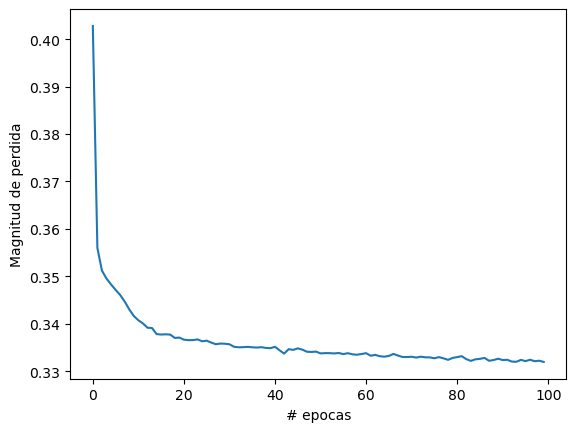

In [80]:
plt.xlabel("# epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [81]:
y_pred = modelo.predict(x_test)
y_pred_df = pd.DataFrame(np.round(y_pred), columns=['Estimacion'])

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [82]:
estimar = pd.concat([pd.DataFrame(x_test), pd.DataFrame(y_test), y_pred_df], axis=1)
estimar

,0,1,2,3,4,5,6,7,8,9,10,11,12,0,Estimacion
0,0.150685,0.264186,0.733333,0.533333,1.0,0.4,0.538462,1.00,1.0,0.0,0.0,0.397959,0.0,1,1.0
1,0.315068,0.047832,0.733333,0.533333,0.0,0.0,0.153846,1.00,1.0,0.0,0.0,0.244898,1.0,1,1.0
2,0.397260,0.048491,1.000000,0.600000,0.0,0.0,0.461538,1.00,1.0,0.0,1.0,0.397959,1.0,1,0.0
3,0.273973,0.159726,0.533333,0.666667,0.0,0.0,0.769231,1.00,1.0,0.0,0.0,0.397959,1.0,0,1.0
4,0.410959,0.152987,0.066667,0.400000,0.0,1.0,0.461538,0.50,0.0,0.0,0.0,0.397959,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14648,0.369863,0.233398,1.000000,0.600000,0.0,0.0,0.846154,1.00,1.0,0.0,0.0,0.448980,1.0,0,0.0
14649,0.726027,0.088253,1.000000,0.600000,0.0,0.0,0.230769,1.00,1.0,0.0,1.0,0.397959,1.0,0,1.0
14650,0.082192,0.172680,0.600000,0.800000,1.0,0.2,0.692308,1.00,1.0,0.0,0.0,0.500000,1.0,1,1.0
14651,0.219178,0.136843,0.400000,0.266667,0.0,0.0,0.153846,0.75,1.0,0.0,0.0,0.397959,0.0,1,1.0


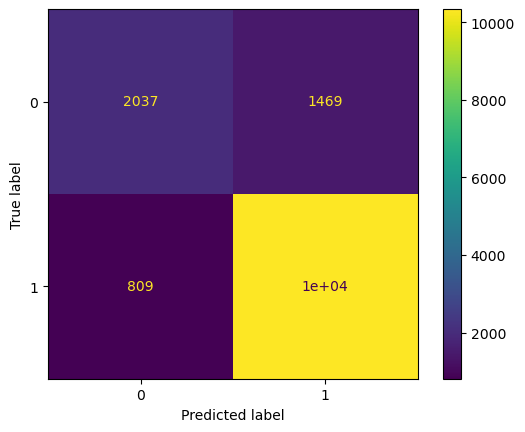

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, np.round(y_pred)), display_labels=[0,1])
disp.plot()